In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"data_cleaned.csv")
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [3]:
df.shape

(891, 25)

In [4]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
#this is imbalance data set

# sns.pairplot(df,hue="Survived") 
- linearly non seprable

In [7]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=10,stratify=y)

In [11]:
from sklearn.tree import DecisionTreeClassifier
# when o/p is in the for of classification use decisionTreeClassifier
# o/p => reg/continuous variable/numerical type => DecisionTreeRegressor

In [13]:
dt=DecisionTreeClassifier(random_state=10)
dt

DecisionTreeClassifier(random_state=10)

In [14]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [15]:
dt.score(x_train,y_train)

0.9844559585492227

In [16]:
dt.score(x_test,y_test)

0.782051282051282

In [ ]:
accuracy score at training = 0.98445595
accuracy score at testing = 0.782051

### this is overfitting

[Text(0.4429768041237113, 0.9722222222222222, 'x[6] <= 0.5\ngini = 0.473\nsamples = 579\nvalue = [357, 222]'),
 Text(0.1506443298969072, 0.9166666666666666, 'x[4] <= 0.5\ngini = 0.383\nsamples = 205\nvalue = [53, 152]'),
 Text(0.04329896907216495, 0.8611111111111112, 'x[0] <= 2.5\ngini = 0.082\nsamples = 117\nvalue = [5, 112]'),
 Text(0.016494845360824743, 0.8055555555555556, 'x[1] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.008247422680412371, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.024742268041237112, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07010309278350516, 0.8055555555555556, 'x[1] <= 26.125\ngini = 0.067\nsamples = 115\nvalue = [4, 111]'),
 Text(0.041237113402061855, 0.75, 'x[0] <= 26.5\ngini = 0.142\nsamples = 39\nvalue = [3, 36]'),
 Text(0.024742268041237112, 0.6944444444444444, 'x[0] <= 25.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.016494845360824743, 0.6388888888888888, 'x[0] <= 22.5\ngini = 0.153\nsamples = 

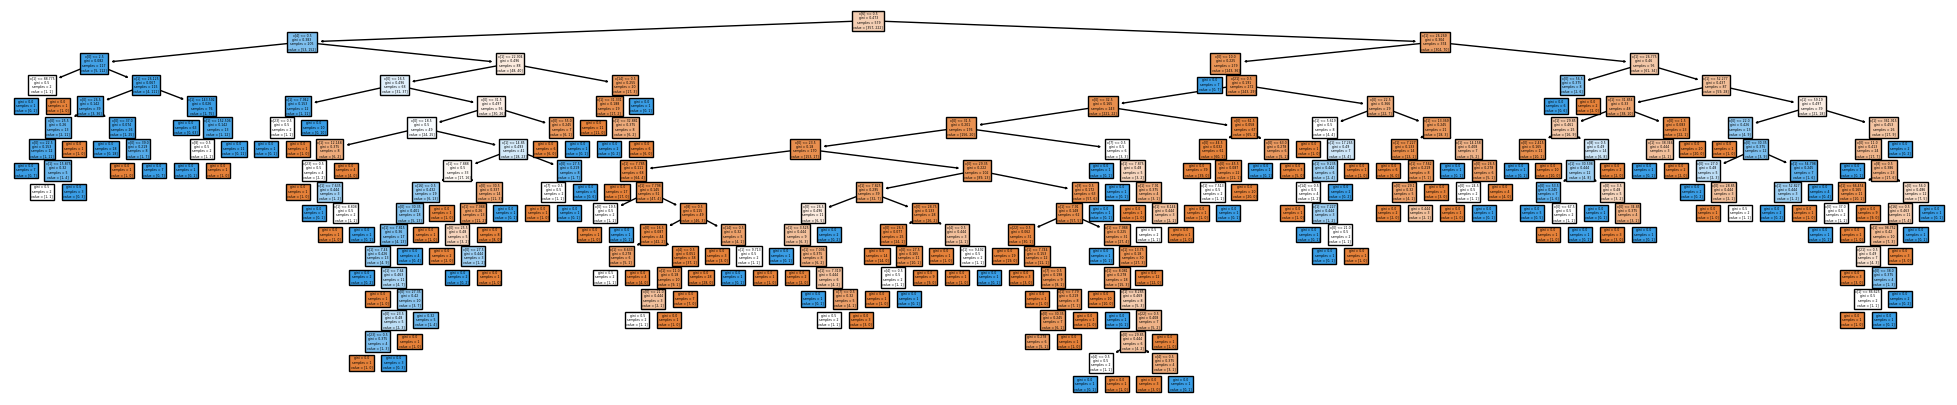

In [20]:
from sklearn import tree
plt.figure(figsize=(25,5))
tree.plot_tree(dt,filled=True)

### Pruning :
- simply cutting the branches of the DT is called pruning
  

#### pre-pruning :
- branches of treee are removed during the setting up tree
- this is technique is used before construction of decision tree
- pre pruning can be done by using hyperparameter tunning
- overcome to overfitting issue
- we can use grid search or random search
- this process is also called 

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid={"criterion":["gini","entropy"],
      "max_depth":range(2,40,1),
      "min_samples_split":range(1,20,1),
      "min_samples_leaf":range(1,20,1)}
grid

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 40),
 'min_samples_split': range(1, 20),
 'min_samples_leaf': range(1, 20)}

In [24]:
dt_gd=DecisionTreeClassifier(random_state=100)
dt_gd

DecisionTreeClassifier(random_state=100)

In [26]:
gd=GridSearchCV(estimator=dt_gd,param_grid=grid,cv=5,n_jobs=-1)
gd # hyperparameter tunning

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(1, 20)})

In [27]:
gd.fit(x_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7220 fits failed out of a total of 137180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7220 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", lin

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(1, 20)})

In [28]:
gd.best_score_

0.8116941529235383

In [29]:
gd.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [32]:
dt1=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 10,
 min_samples_leaf= 2,
 min_samples_split=5)
dt1

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [33]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [34]:
dt1.score(x_train,y_train)

0.8998272884283247

In [35]:
dt1.score(x_test,y_test)

0.7884615384615384

In [ ]:
accuracy score at training = 0.98445595
accuracy score at testing = 0.782051  # 1st base 20%

accuracy score at training = 0.89982
accuracy score at testing = 0.7884615 # prepruning 10%

[Text(0.4094551282051282, 0.9545454545454546, 'x[6] <= 0.5\ngini = 0.473\nsamples = 579\nvalue = [357, 222]'),
 Text(0.15295584045584046, 0.8636363636363636, 'x[4] <= 0.5\ngini = 0.383\nsamples = 205\nvalue = [53, 152]'),
 Text(0.06267806267806268, 0.7727272727272727, 'x[0] <= 2.5\ngini = 0.082\nsamples = 117\nvalue = [5, 112]'),
 Text(0.05128205128205128, 0.6818181818181818, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07407407407407407, 0.6818181818181818, 'x[1] <= 26.125\ngini = 0.067\nsamples = 115\nvalue = [4, 111]'),
 Text(0.045584045584045586, 0.5909090909090909, 'x[0] <= 26.5\ngini = 0.142\nsamples = 39\nvalue = [3, 36]'),
 Text(0.022792022792022793, 0.5, 'x[0] <= 22.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.011396011396011397, 0.4090909090909091, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.03418803418803419, 0.4090909090909091, 'x[8] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.022792022792022793, 0.3181818181818182, 'gini = 0.375\

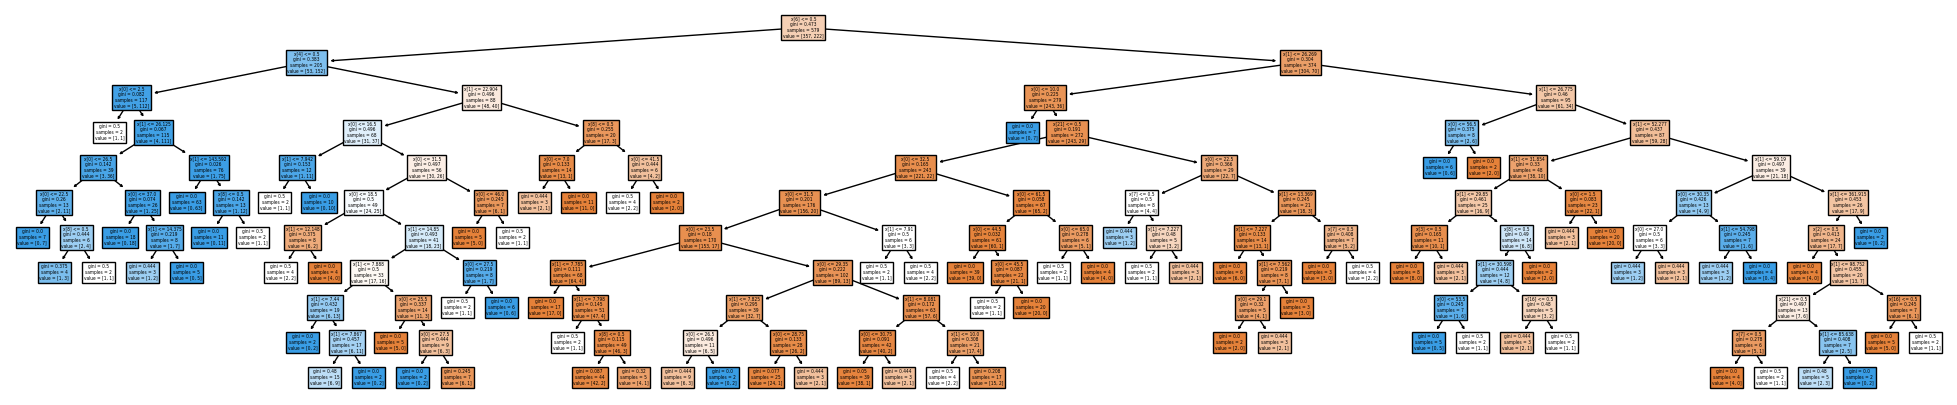

In [36]:
from sklearn import tree
plt.figure(figsize=(25,5))
tree.plot_tree(dt1,filled=True)

In [38]:
train_accuracy=[]
test_accuracy=[]
for i in range (1,50):
    dt_model=DecisionTreeClassifier(max_depth=i,random_state=10)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))

data_max_depth=pd.DataFrame({"max_depth":range(1,50),"Train_accuracy":train_accuracy,
                             "test_accuracy":test_accuracy})
data_max_depth

,max_depth,Train_accuracy,test_accuracy
0,1,0.787565,0.785256
1,2,0.801382,0.759615
2,3,0.830743,0.817308
3,4,0.844560,0.785256
4,5,0.854922,0.814103
5,6,0.880829,0.794872
6,7,0.901554,0.788462
7,8,0.920553,0.810897
8,9,0.937824,0.801282
9,10,0.951641,0.801282


Text(0, 0.5, 'performance comparision')

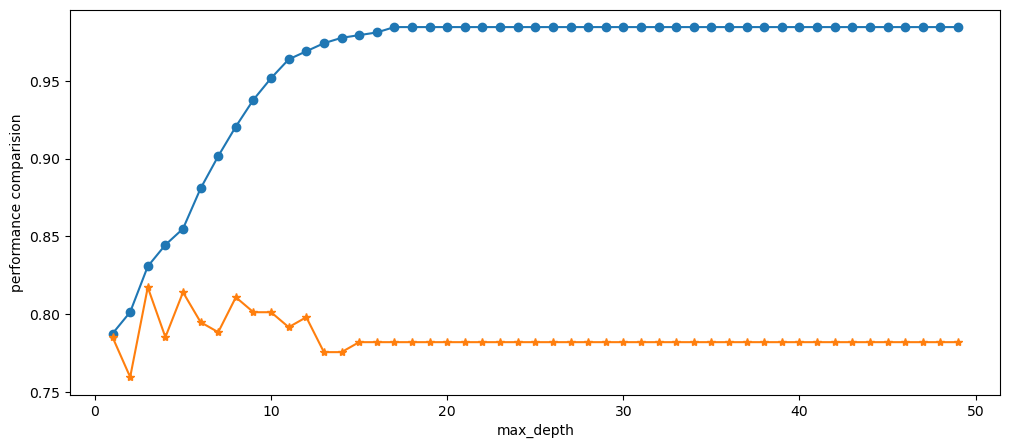

In [43]:
plt.figure(figsize=(12,5))
plt.plot(data_max_depth["max_depth"],data_max_depth["Train_accuracy"],marker="o")
plt.plot(data_max_depth["max_depth"],data_max_depth["test_accuracy"],marker="*")
plt.xlabel("max_depth")
plt.ylabel("performance comparision")


# hw
- min sample split
- min_sample_leaf 
- create one more model for dt with accuracy 
- max_depth=3

### post prunning
- ithis technique is used after the construction of decision tree
- backward pruning
- controlled by a prarameters called cost_complexity_prunning --- depend max_depth and min_samples_split
- bottom to to approach
- slow
- less preferd


- cc_alpha value increse depth of tree get decrese and somtime it will reduce overfitting to underfitting

In [44]:
from sklearn.datasets import load_breast_cancer

In [46]:
x,y=load_breast_cancer(return_X_y =True)

In [53]:
classifier= DecisionTreeClassifier(random_state=10)
classifier

DecisionTreeClassifier(random_state=10)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10,stratify=y)

In [54]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [55]:
classifier.score(x_train,y_train)

1.0

In [56]:
classifier.score(x_test,y_test)

0.9415204678362573

In [57]:
path=classifier.cost_complexity_pruning_path(x_train,y_train)

In [58]:
ccp_alphas=path.ccp_alphas

In [59]:
ccp_alphas

array([0.        , 0.0024909 , 0.00249293, 0.00335008, 0.00463858,
       0.00490857, 0.00491766, 0.00544389, 0.00997103, 0.01427947,
       0.04894064, 0.34578951])

In [61]:
train_accuracy=[]
test_accuracy=[]
for i in ccp_alphas:
    dt_model=DecisionTreeClassifier(ccp_alpha=i,random_state=10)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))

df1=pd.DataFrame({"cc_alpha":ccp_alphas,"training_accuracy":train_accuracy,
                  "testing_accuracy":test_accuracy})
df1

,cc_alpha,training_accuracy,testing_accuracy
0,0.000000,1.000000,0.941520
1,0.002491,0.994975,0.947368
2,0.002493,0.992462,0.947368
3,0.003350,0.989950,0.947368
4,0.004639,0.987437,0.947368
5,0.004909,0.984925,0.947368
6,0.004918,0.982412,0.947368
7,0.005444,0.979899,0.947368
8,0.009971,0.969849,0.918129
9,0.014279,0.962312,0.912281


Text(0, 0.5, 'performance comparision')

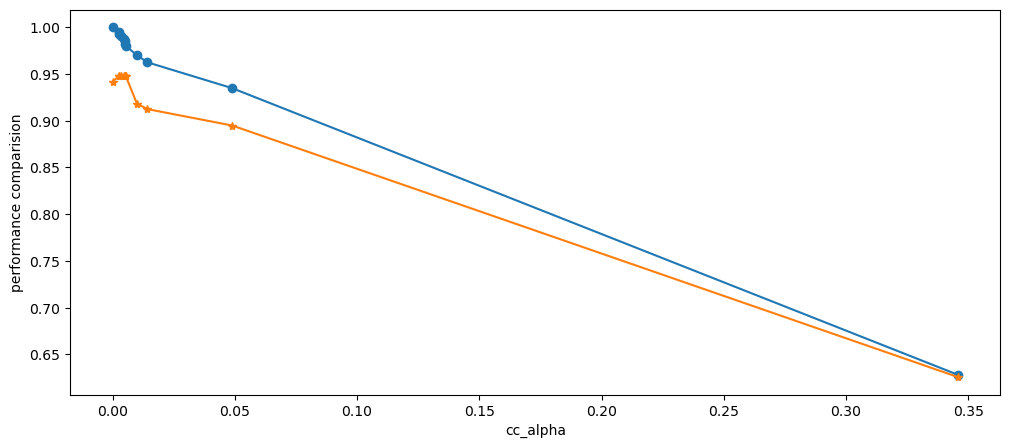

In [63]:
plt.figure(figsize=(12,5))
plt.plot(df1["cc_alpha"],df1["training_accuracy"],marker="o")
plt.plot(df1["cc_alpha"],df1["testing_accuracy"],marker="*")
plt.xlabel("cc_alpha")
plt.ylabel("performance comparision")


In [66]:
classifier=DecisionTreeClassifier(ccp_alpha=0.0544,random_state=20)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0544, random_state=20)

In [67]:
print("train_accuracy",classifier.score(x_train,y_train))
print("test_accuracy",classifier.score(x_test,y_test))

train_accuracy 0.9346733668341709
test_accuracy 0.8947368421052632
